In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [94]:
data=pd.read_csv("smartcart_customers.csv")

In [95]:
data.shape

(2240, 22)

In [96]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,46,27,15,5,5,3,6,5,0,0


In [97]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
Response                0
dtype: int64

In [98]:
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Complain                 int64
Response                 int64
dtype: object

# Data Preprocessing

In [99]:
#1] Handle the Null Values

In [100]:
data["Income"]=data["Income"].fillna(data["Income"].median())

In [101]:
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Complain               0
Response               0
dtype: int64

# Feature Engineering

In [102]:
#1]Adding Age Feature

In [103]:
data["Age"]=2026-data["Year_Birth"]

In [104]:
#2]Customer Joining date

In [105]:
data["Dt_Customer"]=pd.to_datetime(data["Dt_Customer"],dayfirst=True)
reference_data=data["Dt_Customer"].max()
data["Customer_Tenure_Days"]=(reference_data-data["Dt_Customer"])

In [106]:
data["Customer_Tenure_Days"].head()

0   663 days
1   113 days
2   312 days
3   139 days
4   161 days
Name: Customer_Tenure_Days, dtype: timedelta64[ns]

In [107]:
#spending

data["TotalSpending"]=data["MntWines"]+data["MntFruits"]+data["MntMeatProducts"]+data["MntSweetProducts"]+data["MntGoldProds"]+data["MntFishProducts"]
    

In [108]:
#Children
data["Total_Childeren"]=data["Kidhome"]+data["Teenhome"]

In [109]:
data["Total_Childeren"].head()

0    0
1    2
2    0
3    1
4    1
Name: Total_Childeren, dtype: int64

In [110]:
#Education
data["Education"].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [111]:
data["Education"]=data["Education"].replace({
    "Basic":"Undergraduate",
    "2n Cycle":"Undergraduate",
    "Graduation":"Graduate",
    "Master":"PostGraduate",
    "PhD":"PostGraduate"
})

In [112]:
data["Education"].value_counts()

Education
Graduate         1127
PostGraduate      856
Undergraduate     257
Name: count, dtype: int64

In [113]:
#Martial Status

data["Marital_Status"].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [114]:
data["Living_with"]=data["Marital_Status"].replace({
    "Married":"partner",
    "Together":"partner",
    "Single":"Alone",
    "Widow":"Alone",
    "Absurd":"Alone",
    "YOLO":"Alone",
    "Divorced":"Alone"    
})

In [115]:
data["Living_with"].value_counts()


Living_with
partner    1444
Alone       796
Name: count, dtype: int64

In [116]:
data.shape

(2240, 27)

# Drop Columns

In [117]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Age', 'Customer_Tenure_Days', 'TotalSpending',
       'Total_Childeren', 'Living_with'],
      dtype='object')

In [118]:
cols=["ID","Year_Birth","Kidhome","Marital_Status","Teenhome","MntWines","Dt_Customer","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]


data_cleaned=data.drop(columns=cols)

In [119]:
data_cleaned.shape

(2240, 15)

# Remove Outliers

In [120]:
data_cleaned.columns

Index(['Education', 'Income', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Complain', 'Response', 'Age',
       'Customer_Tenure_Days', 'TotalSpending', 'Total_Childeren',
       'Living_with'],
      dtype='object')

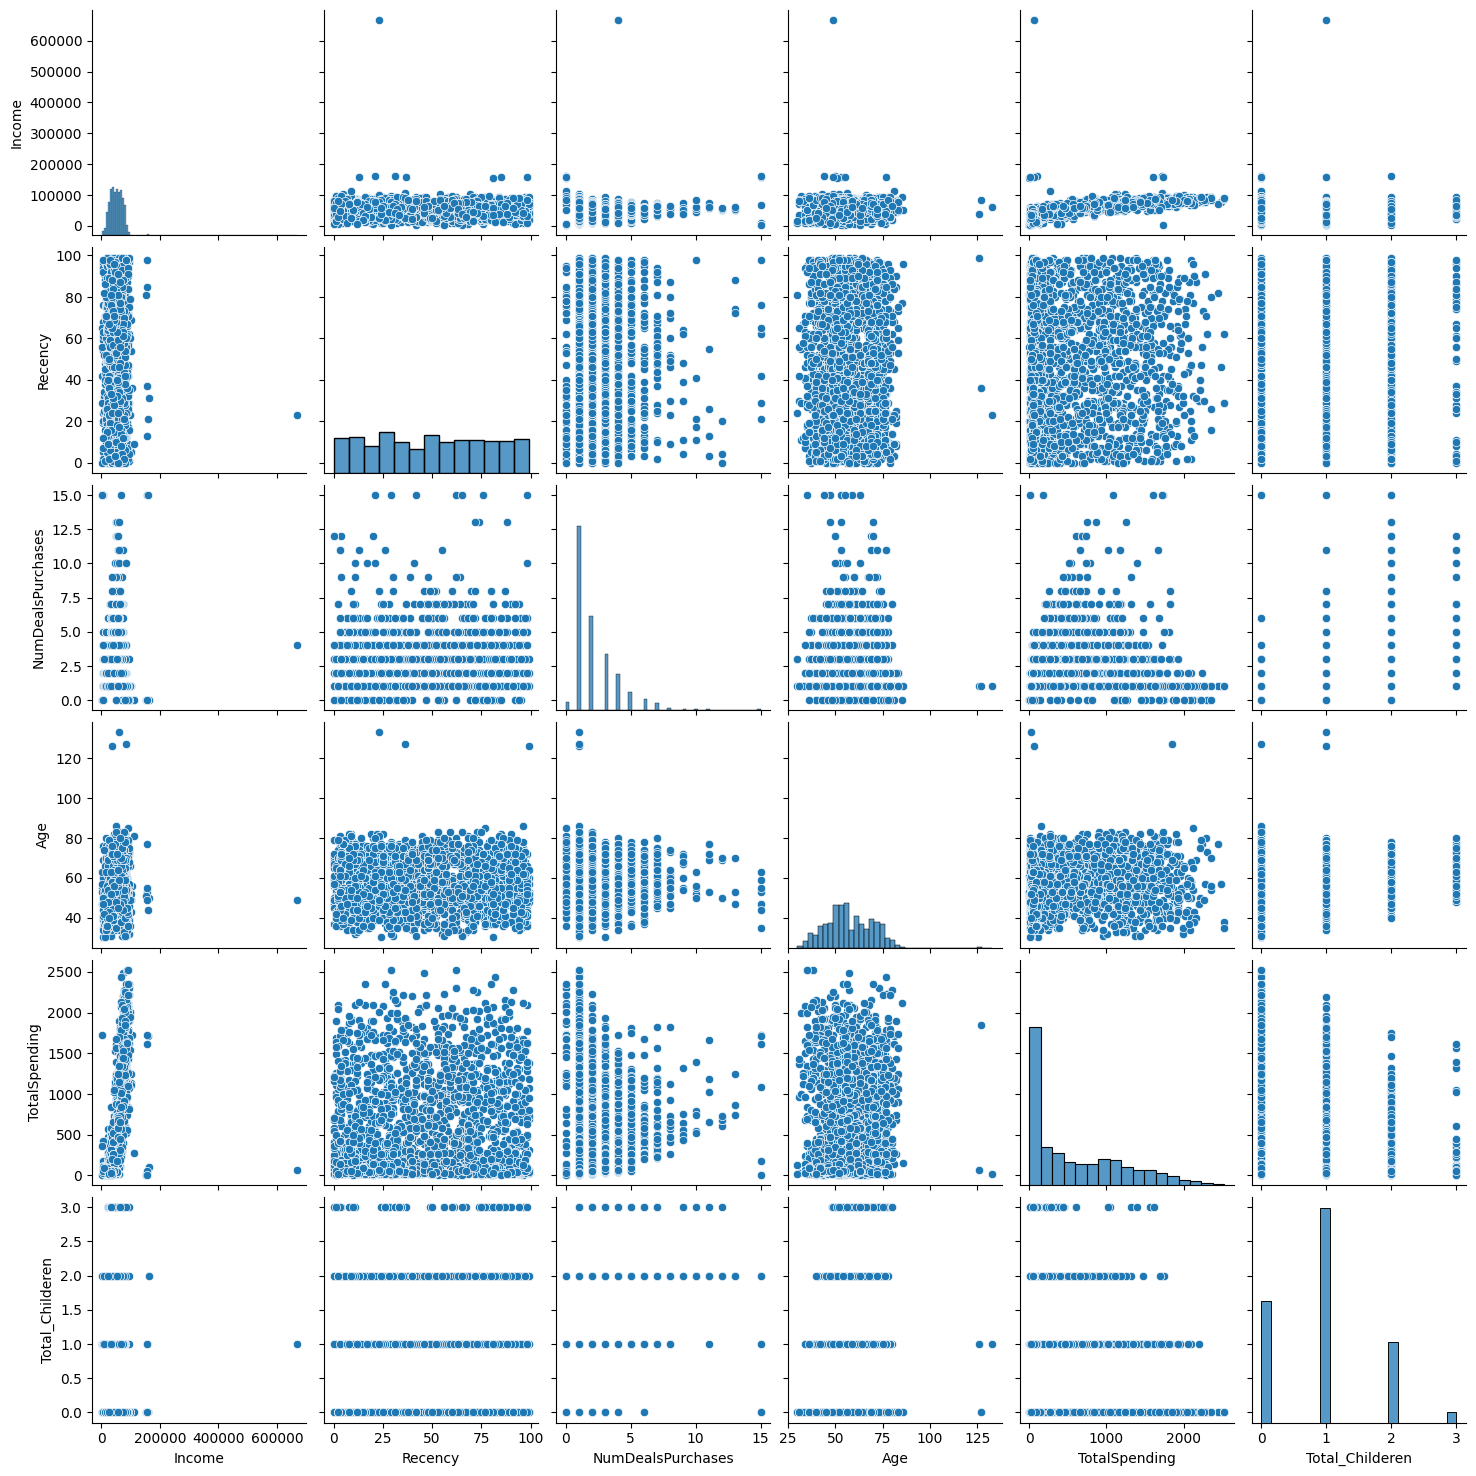

In [121]:
columns=["Income","Recency","NumDealsPurchases","Age","TotalSpending","Total_Childeren"]
# to identitfy te outlier we use pairplot methods
sns.pairplot(data_cleaned[columns])

In [122]:
# Remove outliers
print("Datasize with outliers:",len(data))

data_cleaned=data_cleaned[(data_cleaned["Age"]<90)]
data_cleaned=data_cleaned[(data_cleaned["Income"]<600_000)]

print("Datasize without outliers:",len(data_cleaned))

Datasize with outliers: 2240
Datasize without outliers: 2236


# HeatMap for Corealtion

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

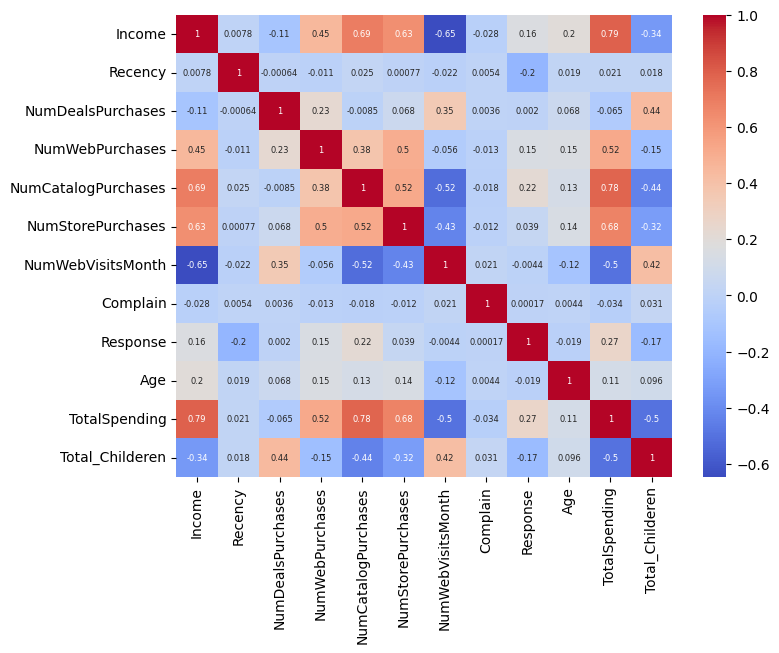

In [123]:
#heatmap for numerical values

corr=data_cleaned.corr(numeric_only=True)

plt.figure(figsize=(8,6))

sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",

    annot_kws={"size":6}
    
)
plt.tight_layout

# Encoding

In [124]:
from sklearn.preprocessing import OneHotEncoder

In [125]:
ohe=OneHotEncoder()

cat_cols=["Education","Living_with"]

enc_cols=ohe.fit_transform(data_cleaned[cat_cols])

enc_df=pd.DataFrame(enc_cols.toarray(),columns=ohe.get_feature_names_out(cat_cols),index=data_cleaned.index)

In [126]:
enc_df.head()

,Education_Graduate,Education_PostGraduate,Education_Undergraduate,Living_with_Alone,Living_with_partner
0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0


In [127]:
data_encoded=pd.concat([data_cleaned.drop(columns=cat_cols),enc_df],axis=1)

In [128]:
data_encoded.shape

(2236, 18)

In [129]:
data_encoded.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,TotalSpending,Total_Childeren,Education_Graduate,Education_PostGraduate,Education_Undergraduate,Living_with_Alone,Living_with_partner
0,58138.0,58,3,8,10,4,7,0,1,69,663 days,1617,0,1.0,0.0,0.0,1.0,0.0
1,46344.0,38,2,1,1,2,5,0,0,72,113 days,27,2,1.0,0.0,0.0,1.0,0.0
2,71613.0,26,1,8,2,10,4,0,0,61,312 days,776,0,1.0,0.0,0.0,0.0,1.0
3,26646.0,26,2,2,0,4,6,0,0,42,139 days,53,1,1.0,0.0,0.0,0.0,1.0
4,58293.0,94,5,5,3,6,5,0,0,45,161 days,422,1,0.0,1.0,0.0,0.0,1.0


# Scaling

In [130]:
from sklearn.preprocessing import StandardScaler

In [135]:
scaler=StandardScaler()

In [136]:
x=data_encoded

In [141]:
X_scaled=scaler.fit_transform(x)

In [134]:
data_encoded.columns

Index(['Income', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Age', 'Customer_Tenure_Days', 'TotalSpending',
       'Total_Childeren', 'Education_Graduate', 'Education_PostGraduate',
       'Education_Undergraduate', 'Living_with_Alone', 'Living_with_partner'],
      dtype='object')

In [138]:
x.dtypes

Income                             float64
Recency                              int64
NumDealsPurchases                    int64
NumWebPurchases                      int64
NumCatalogPurchases                  int64
NumStorePurchases                    int64
NumWebVisitsMonth                    int64
Complain                             int64
Response                             int64
Age                                  int64
Customer_Tenure_Days       timedelta64[ns]
TotalSpending                        int64
Total_Childeren                      int64
Education_Graduate                 float64
Education_PostGraduate             float64
Education_Undergraduate            float64
Living_with_Alone                  float64
Living_with_partner                float64
dtype: object

In [139]:
data_encoded['Customer_Tenure_Days'] = data_encoded['Customer_Tenure_Days'].dt.days
#customer_ten_days

In [140]:
x.dtypes

Income                     float64
Recency                      int64
NumDealsPurchases            int64
NumWebPurchases              int64
NumCatalogPurchases          int64
NumStorePurchases            int64
NumWebVisitsMonth            int64
Complain                     int64
Response                     int64
Age                          int64
Customer_Tenure_Days         int64
TotalSpending                int64
Total_Childeren              int64
Education_Graduate         float64
Education_PostGraduate     float64
Education_Undergraduate    float64
Living_with_Alone          float64
Living_with_partner        float64
dtype: object

# visulaization

In [144]:
X_scaled.shape

(2236, 18)

In [146]:
from sklearn.decomposition import PCA

In [147]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(X_scaled)

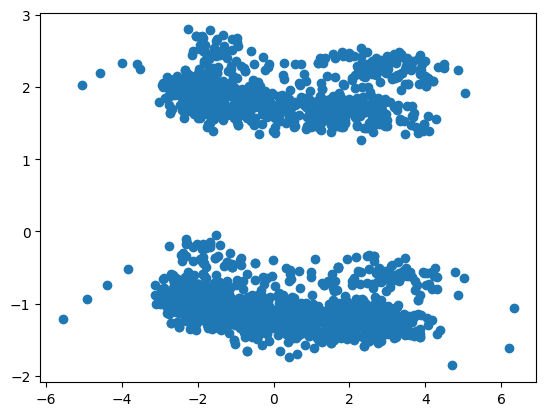

In [148]:
plt.scatter(x_pca[:,0],x_pca[:,1])

In [149]:
pca.explained_variance_ratio_

array([0.23163158, 0.11385454])

In [154]:
pca=PCA(n_components=3)
x_pca=pca.fit_transform(X_scaled)

In [155]:
#overall vareince in 0.23+0.11->34 so it is not good varience so make pca components 3

Text(0.5, 0.92, '3D ScatterPlot')

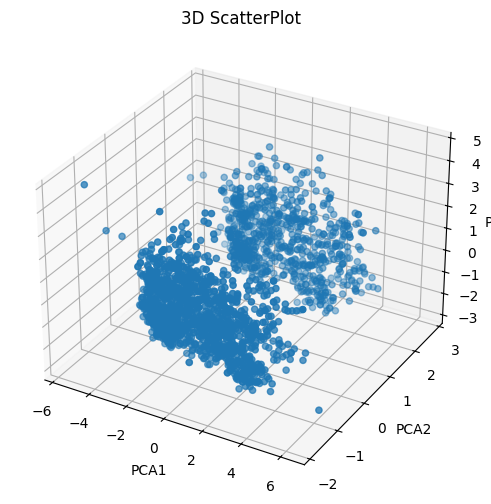

In [159]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2])

ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
ax.set_title("3D ScatterPlot")

# Analyze the k val

In [165]:
#elbow method

from sklearn.cluster import KMeans
from kneed import KneeLocator

wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit_predict(x_pca)
    wcss.append(kmeans.inertia_)

In [167]:
knee=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")
optimal_k=knee.elbow

In [169]:
print("The Optimal value of k is:",optimal_k)

The Optimal value of k is: 4


Text(0, 0.5, 'wcss')

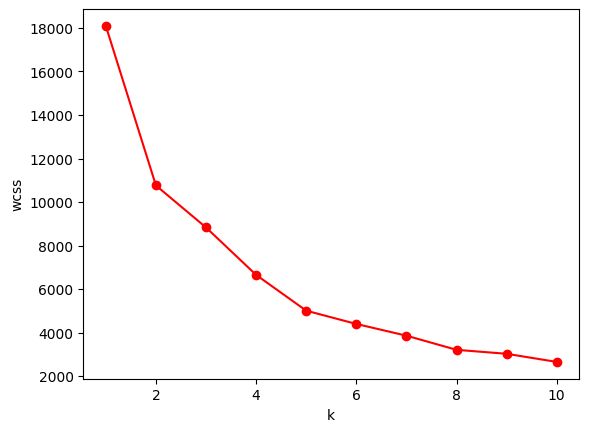

In [172]:
plt.plot(range(1,11),wcss,marker='o',color="red")
plt.xlabel("k")
plt.ylabel("wcss")

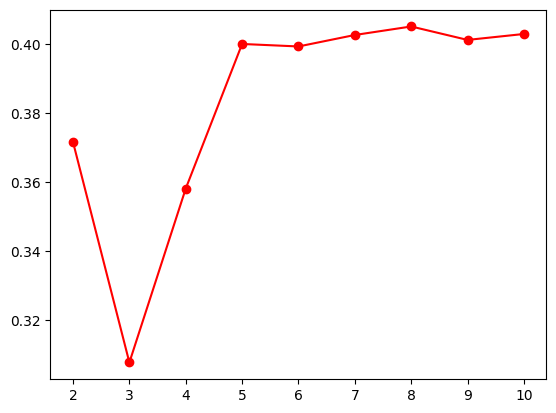

In [175]:
# Silhoutte Score

from sklearn.metrics import silhouette_score
scores=[]

for k in range(2,11):
    kmeans=KMeans(n_clusters=k,random_state=42)
    labels=kmeans.fit_predict(x_pca)
    score=silhouette_score(x_pca,labels)
    scores.append(score)

#plt
plt.plot(range(2,11),scores,marker='o',color="red")

# We got the optimal value of k as 4

# Apply Kmeans Algo

In [176]:
kmeans=KMeans(n_clusters=4,random_state=42)
labels_kmeans=kmeans.fit_predict(x_pca)

Text(0.5, 0.92, '3D ScatterPlot')

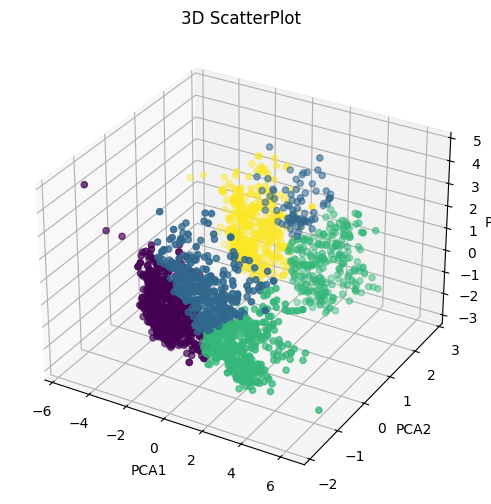

In [177]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=labels_kmeans)

ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
ax.set_title("3D ScatterPlot")

# Agglomerative Clustering

In [178]:
from sklearn.cluster import AgglomerativeClustering

In [180]:
agg_clf=AgglomerativeClustering(n_clusters=4,linkage="ward")
labels_agg=agg_clf.fit_predict(x_pca)

Text(0.5, 0.92, '3D ScatterPlot')

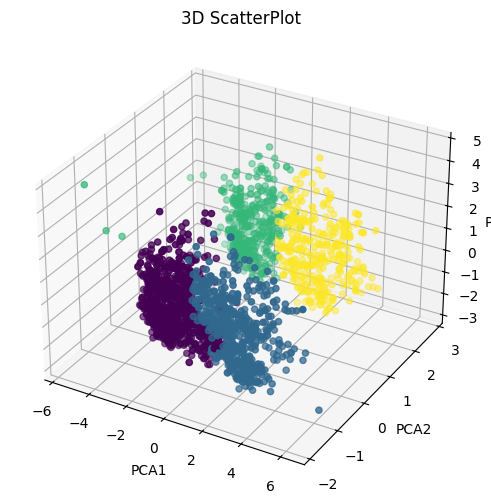

In [199]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111,projection="3d")  #the 111 stands for 1 row col index
ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=labels_agg)

ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
ax.set_title("3D ScatterPlot")

# Characterization of Clusters

In [193]:
x["cluster"]=labels_agg

In [196]:
x.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,TotalSpending,Total_Childeren,Education_Graduate,Education_PostGraduate,Education_Undergraduate,Living_with_Alone,Living_with_partner,cluster
0,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,1.0,0.0,0.0,1.0,0.0,3
1,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,1.0,0.0,0.0,1.0,0.0,2
2,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,1.0,0.0,0.0,0.0,1.0,1
3,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,1.0,0.0,0.0,0.0,1.0,0
4,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,0.0,1.0,0.0,0.0,1.0,0


<Axes: xlabel='cluster', ylabel='count'>

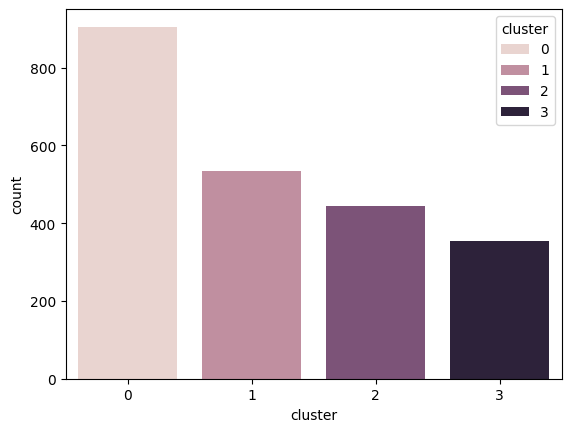

In [200]:
pal=["red","blue","yellow","green"]
sns.countplot(x=x["cluster"],hue=x["cluster"])

<Axes: xlabel='TotalSpending', ylabel='Income'>

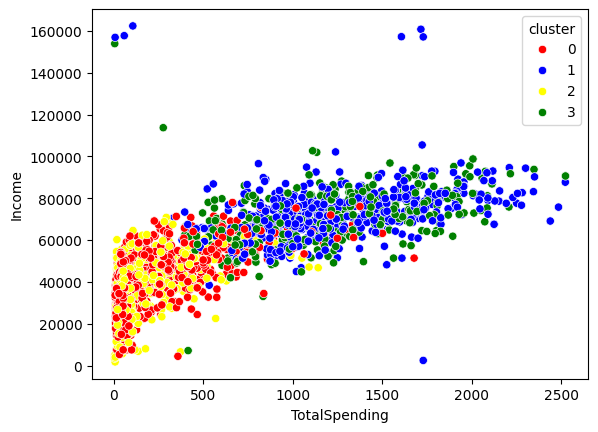

In [195]:
# income vs spending pattern 


sns.scatterplot(x=x["TotalSpending"],y=x["Income"],hue=x["cluster"],palette=pal)


# Cluster Summary

In [198]:
cluster_Summmary=x.groupby("cluster").mean()
print(cluster_Summmary)

               Income    Recency  NumDealsPurchases  NumWebPurchases  \
cluster                                                                
0        39680.580110  48.914917           2.594475         3.153591   
1        72808.445693  49.202247           1.958801         5.687266   
2        36960.143018  48.319820           2.594595         2.713964   
3        70722.681303  50.504249           1.855524         5.790368   

         NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
cluster                                                                        
0                   0.969061           4.143646           6.307182  0.011050   
1                   5.498127           8.659176           3.580524  0.005618   
2                   0.837838           3.623874           6.659910  0.011261   
3                   5.014164           8.430595           3.728045  0.005666   

         Response        Age  Customer_Tenure_Days  TotalSpending  \
cluster          